In [1]:
import numpy as np  # Import library numpy untuk operasi numerik
import pandas as pd  # Import library pandas untuk manipulasi data

In [2]:
import json  # Import library json untuk membaca data dari file JSON

with open('intents copy.json', 'r') as f:
    data = json.load(f)  # Membaca data dari file JSON dan menyimpannya dalam variabel 'data'

df = pd.DataFrame(data['intents'])  # Membuat DataFrame dari bagian 'intents' dalam data JSON
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...","[Hello there. How can i help you?, Hi there. W..."
1,morning,[Good morning],[Good morning. How are you feeling today? ]
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
126,quote-inner-strength,"[I need quotes for finding inner strength, Quo...",[Strength doesn't come from what you can do; i...
127,venting,"[I feel so lost, I don't know what to do, I'm ...",[I'm sorry to hear that you're feeling lost. L...
128,problems,"[I don't know what to do, I have a problem, Ev...",[I'm sorry you're facing difficulties. Let's w...
129,empathy,"[I feel alone, Nobody understands me, I need s...",[You're not alone. I'm here to offer support a...


In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}  # Membuat dictionary kosong untuk menyimpan data yang akan diubah ke DataFrame
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]  # Mengambil pola (patterns) dari DataFrame
    rspns = df[df.index == i]['responses'].values[0]  # Mengambil respons dari DataFrame
    tag = df[df.index == i]['tag'].values[0]  # Mengambil tag dari DataFrame
    for j in range(len(ptrns)):
        dic['tag'].append(tag)  # Menambahkan tag ke dalam dictionary
        dic['patterns'].append(ptrns[j])  # Menambahkan pola ke dalam dictionary
        dic['responses'].append(rspns)  # Menambahkan respons ke dalam dictionary

df = pd.DataFrame.from_dict(dic)  # Membuat DataFrame baru dari dictionary
pd.set_option("display.max_rows", None)  # Menampilkan semua baris DataFrame ketika ditampilkan
df  # Menampilkan DataFrame


,tag,patterns,responses
0,greeting,Hi,"[Hello there. How can i help you?, Hi there. W..."
1,greeting,Hey,"[Hello there. How can i help you?, Hi there. W..."
2,greeting,Is anyone there?,"[Hello there. How can i help you?, Hi there. W..."
3,greeting,Hi there,"[Hello there. How can i help you?, Hi there. W..."
4,greeting,Hello,"[Hello there. How can i help you?, Hi there. W..."
5,greeting,Hey there,"[Hello there. How can i help you?, Hi there. W..."
6,greeting,Howdy,"[Hello there. How can i help you?, Hi there. W..."
7,greeting,Hola,"[Hello there. How can i help you?, Hi there. W..."
8,greeting,Bonjour,"[Hello there. How can i help you?, Hi there. W..."
9,greeting,Konnichiwa,"[Hello there. How can i help you?, Hi there. W..."


In [4]:
df.to_excel('mentalhealth.xlsx', index=False)

In [5]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem-1',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'MentalHealthBot-useful', 'problem-breakup',
       'agree-problem-breakup', 'problem-broken-home',
       'problem-overthinking-future', 'agree-problem-overthinking-future',
       'problem-overthinking', 'agree-problem-overthinking',
       'agree-problem-broken-home', 'user-advice', 'learn-mental-health',
       'mental-health-fact', 'fact-1', 'fact-2', 'fact-3', 'fact-5',
       'fact-6', 'fact-7', 'fact-8', 'fa

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 361,
 'word_counts': '{"hi": 2, "hey": 2, "is": 28, "anyone": 2, "there": 6, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 3, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 5, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 25, "the": 28, "help": 8, "than": 2, "very": 3, "much": 4, "nothing": 3, "intro": 1, "please": 7, "who": 6, "are": 21, "what": 47, "tell": 6, "me": 28, "more": 7, "about": 41, "yourself": 3, "your": 11, "name": 4, "should": 3, "i": 133, "call": 1, "what\'s": 3, "can": 22, "do": 20, "created": 2, "how": 29, "were": 2, "made": 1, "my": 23, "am": 17, "go": 5, "by": 2, "could": 2, "give":

In [7]:
vocab_size = len(tokenizer.word_index)  # Menghitung jumlah kata unik dalam tokenizer
print('number of unique words = ', vocab_size)  # Menampilkan jumlah kata unik

number of unique words =  425


In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])  # Mengonversi teks pola menjadi urutan angka
X = pad_sequences(ptrn2seq, padding='post')  # Melakukan padding terhadap urutan angka
print('X shape = ', X.shape)  # Menampilkan bentuk (shape) dari X

lbl_enc = LabelEncoder()  # Membuat objek LabelEncoder
y = lbl_enc.fit_transform(df['tag'])  # Mengonversi label kelas menjadi angka
print('y shape = ', y.shape)  # Menampilkan bentuk (shape) dari y
print('num of classes = ', len(np.unique(y)))  # Menampilkan jumlah kelas unik

X shape =  (361, 18)
y shape =  (361,)
num of classes =  131


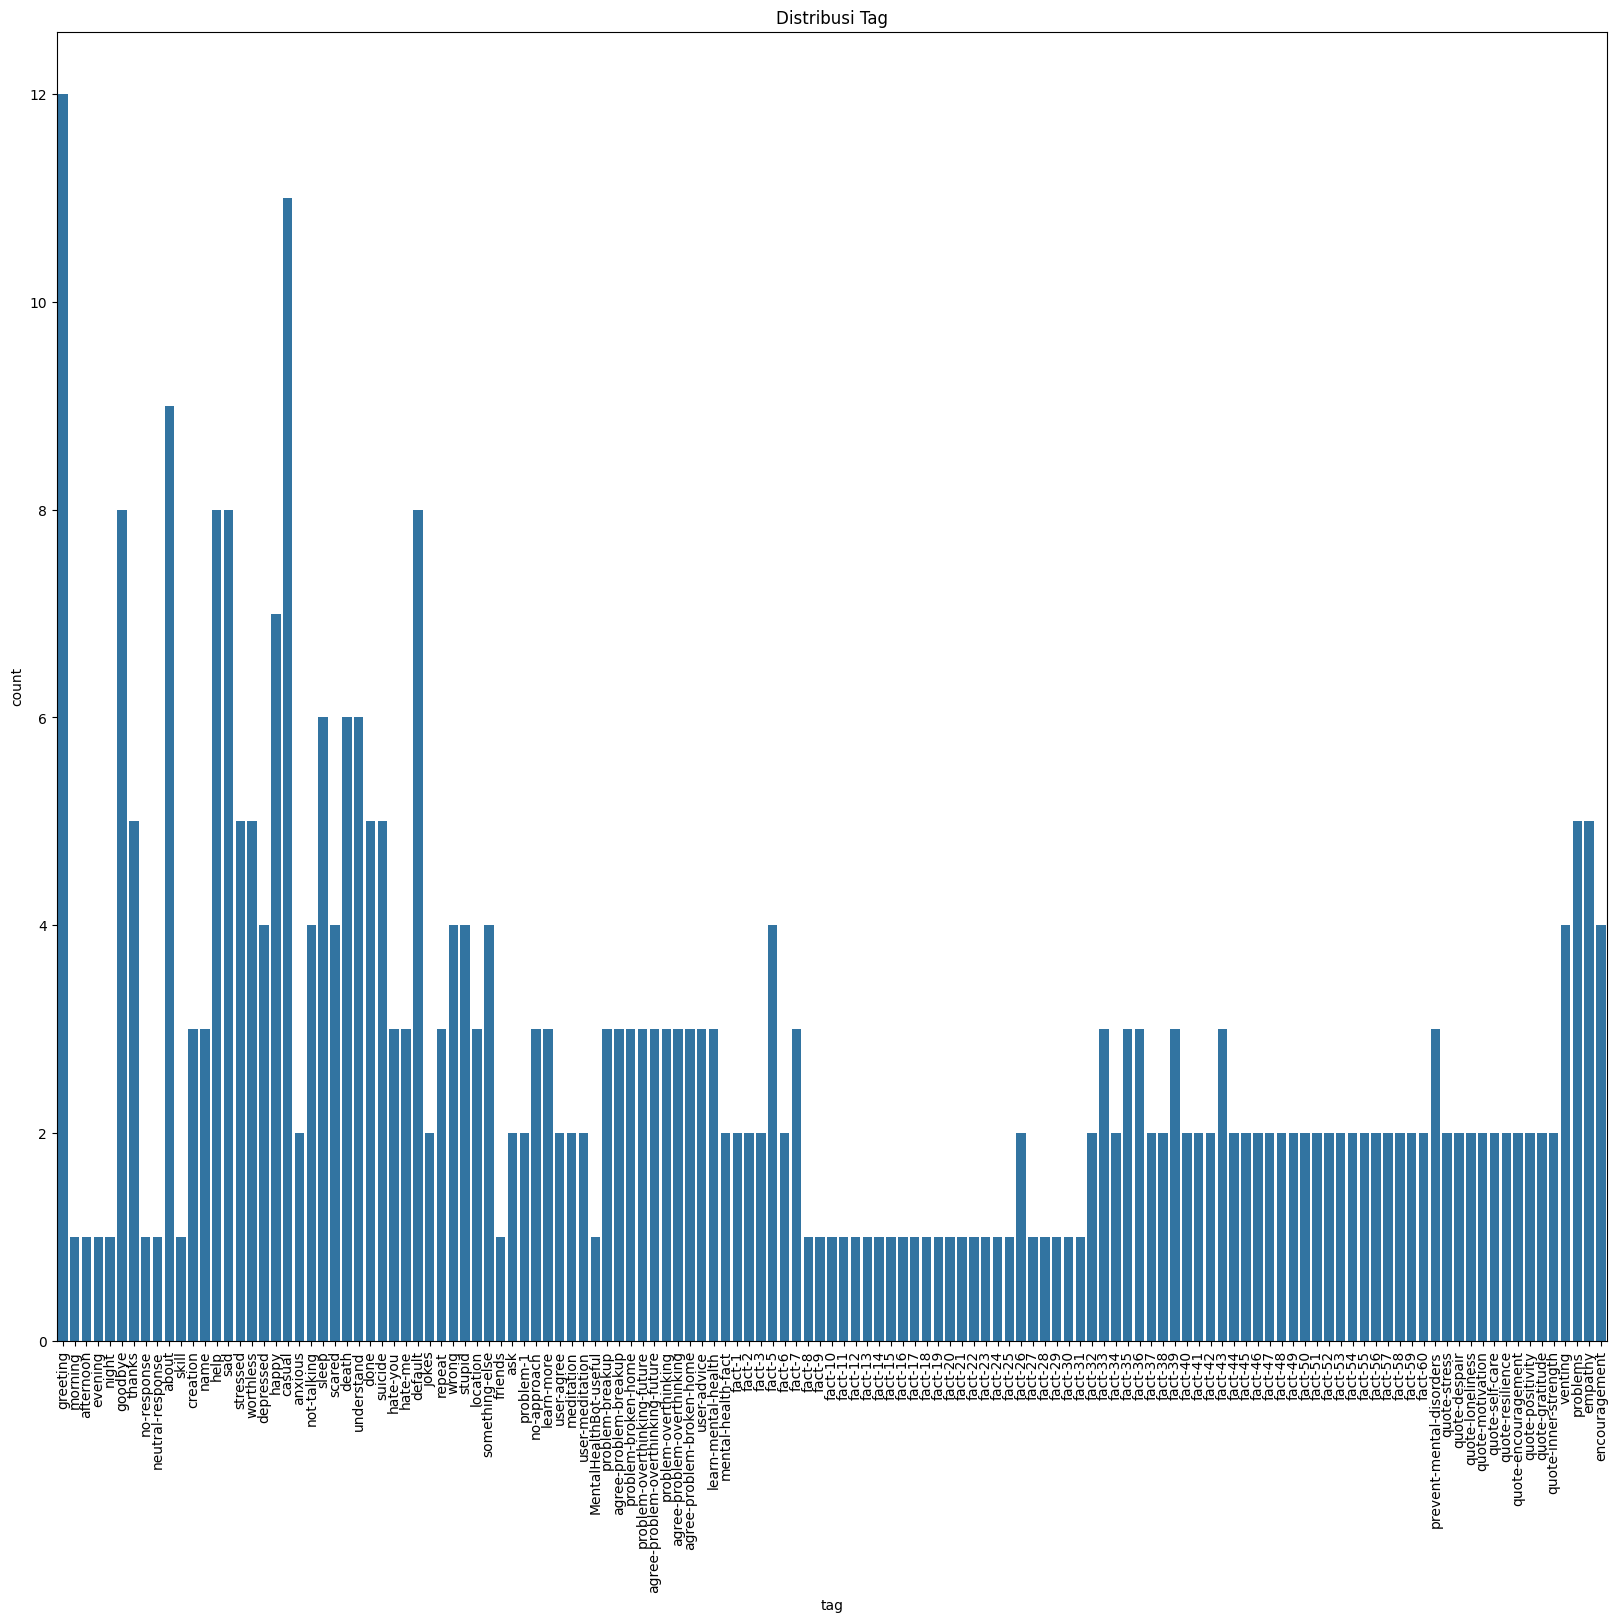

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi tag
plt.figure(figsize=(20, 17))
sns.countplot(x='tag', data=df)
plt.xticks(rotation=90)
plt.title('Distribusi Tag')
plt.show()

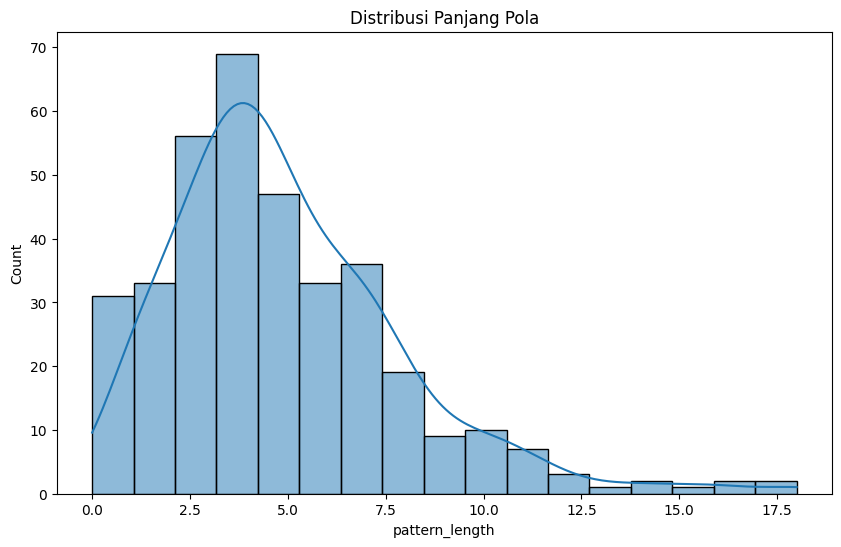

In [11]:
# Visualisasi panjang pola (patterns)
df['pattern_length'] = df['patterns'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], kde=True)
plt.title('Distribusi Panjang Pola')
plt.show()


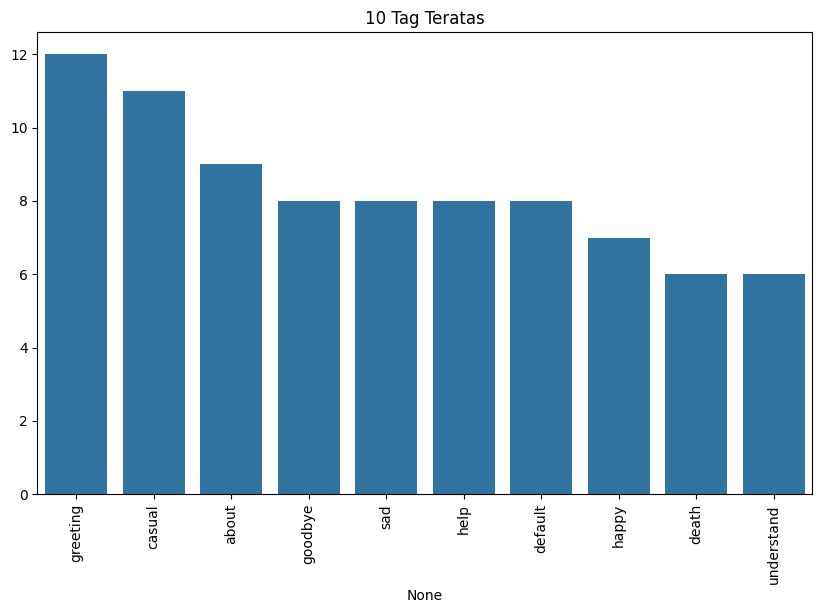

In [12]:
# Visualisasi 10 tag teratas
top_10_tags = df['tag'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tags.index, y=top_10_tags.values)
plt.xticks(rotation=90)
plt.title('10 Tag Teratas')
plt.show()

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()  # Membuat model Sequential

# Menambahkan lapisan-lapisan ke dalam model
model.add(Input(shape=(X.shape[1])))  # Lapisan input dengan bentuk sesuai dengan X
model.add(Embedding(input_dim=vocab_size+1, output_dim=100, mask_zero=True))  # Lapisan embedding dengan vocab_size + 1 sebagai input_dim
model.add(LSTM(32, return_sequences=True))  # Lapisan LSTM dengan 32 unit dan return_sequences=True
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(LSTM(32, return_sequences=True))  # Lapisan LSTM kedua dengan 32 unit dan return_sequences=True
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(LSTM(32))  # Lapisan LSTM ketiga dengan 32 unit
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(Dense(128, activation="relu"))  # Lapisan dense dengan 128 unit dan fungsi aktivasi ReLU
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(Dropout(0.2))  # Lapisan dropout dengan tingkat dropout 0.2
model.add(Dense(128, activation="relu"))  # Lapisan dense kedua dengan 128 unit dan fungsi aktivasi ReLU
model.add(LayerNormalization())  # Lapisan normalisasi
model.add(Dropout(0.2))  # Lapisan dropout kedua dengan tingkat dropout 0.2
model.add(Dense(len(np.unique(y)), activation="softmax"))  # Lapisan dense terakhir dengan jumlah unit sesuai dengan jumlah kelas dan fungsi aktivasi softmax

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])  # Mengompilasi model dengan optimizer Adam, fungsi loss sparse_categorical_crossentropy, dan metrik akurasi

model.summary()  # Menampilkan ringkasan model
plot_model(model, show_shapes=True)  # Menampilkan struktur visual model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 100)           42600     
                                                                 
 lstm (LSTM)                 (None, 18, 32)            17024     
                                                                 
 layer_normalization (LayerN  (None, 18, 32)           64        
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_1 (Laye  (None, 18, 32)           64        
 rNormalization)                                                 
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

In [14]:
model_history = model.fit(x=X,  # Data input X
                          y=y,  # Data output y
                          batch_size=10,  # Ukuran batch yang digunakan dalam setiap iterasi
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],  # Menggunakan EarlyStopping untuk menghentikan pelatihan jika akurasi tidak meningkat setelah 3 epoch
                          epochs=60)  # Jumlah epoch (iterasi) pelatihan


Epoch 1/60
37/37 [==============================] - 8s 16ms/step - loss: 5.3006 - accuracy: 0.0194
Epoch 2/60
37/37 [==============================] - 1s 15ms/step - loss: 4.3796 - accuracy: 0.0997
Epoch 3/60
37/37 [==============================] - 1s 16ms/step - loss: 3.8131 - accuracy: 0.1662
Epoch 4/60
37/37 [==============================] - 1s 15ms/step - loss: 3.1656 - accuracy: 0.3102
Epoch 5/60
37/37 [==============================] - 1s 16ms/step - loss: 2.7213 - accuracy: 0.3684
Epoch 6/60
37/37 [==============================] - 1s 16ms/step - loss: 2.3343 - accuracy: 0.4626
Epoch 7/60
37/37 [==============================] - 1s 15ms/step - loss: 1.9820 - accuracy: 0.5512
Epoch 8/60
37/37 [==============================] - 1s 15ms/step - loss: 1.6621 - accuracy: 0.6177
Epoch 9/60
37/37 [==============================] - 1s 16ms/step - loss: 1.4409 - accuracy: 0.6427
Epoch 10/60
37/37 [==============================] - 1s 15ms/step - loss: 1.2267 - accuracy: 0.7341
Epoch 11/

In [15]:
import re
import random

def inputan_user(pattern):
    # Preprocess input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)  # Menghapus karakter selain huruf dan tanda kutip dari pattern
    txt = txt.lower()  # Mengonversi pattern menjadi huruf kecil
    txt = txt.split()  # Membagi pattern menjadi kata-kata
    txt = " ".join(txt)  # Menggabungkan kata-kata kembali menjadi teks
    text.append(txt)  # Menambahkan teks ke dalam list

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)  # Mengonversi teks input pengguna menjadi urutan angka
    x_test = np.array(x_test).squeeze()  # Mengonversi ke dalam array dan menghapus dimensi yang tidak perlu
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])  # Melakukan padding terhadap urutan angka

    # Make prediction using the model
    y_pred = model.predict(x_test)  # Memprediksi kelas dengan model yang telah dilatih
    y_pred = y_pred.argmax()  # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    tag = lbl_enc.inverse_transform([y_pred])[0]  # Mengonversi indeks kelas kembali menjadi label kelas
    responses = df[df['tag'] == tag]['responses'].values[0]  # Mengambil respons berdasarkan label kelas

    # Display user input and bot response
    print("User: {}".format(pattern))
    print(" BOT : {}".format(random.choice(responses)))  # Menampilkan respons bot secara acak dari respons yang tersedia


In [16]:
inputan_user('Hi! How are you?')

1/1 [==============================] - 3s 3s/step
User: Hi! How are you?
 BOT : Hi there. What brings you here today?


In [17]:
inputan_user('Iam happy today')

1/1 [==============================] - 0s 20ms/step
User: Iam happy today
 BOT : Did something happen which made you feel this way?


In [18]:
inputan_user('may i ask a question?')

1/1 [==============================] - 0s 20ms/step
User: may i ask a question?
 BOT : Of course. Feel free to ask me anything. I'll do my best to answer you


In [19]:
inputan_user("what is depression?")

1/1 [==============================] - 0s 14ms/step
User: what is depression?
 BOT : Depression is a mental health disorder characterized by persistent feelings of sadness, hopelessness, and a lack of interest or pleasure in activities. It goes beyond normal feelings of sadness and can impact various aspects of life. Depression is a treatable condition, and seeking professional help is crucial for an accurate diagnosis and appropriate treatment.


In [20]:
inputan_user("How do i know if i have Depression?	")

1/1 [==============================] - 0s 20ms/step
User: How do i know if i have Depression?	
 BOT : For a diagnosis of depression, a person needs to have experienced low mood or loss of interest or pleasure in life for at least 2 weeks. Also, they will have experienced the following symptoms: feelings of sadness, hopelessness, or irritability nearly every day.


In [21]:
inputan_user("Are there cures for mental health problems?	")

1/1 [==============================] - 0s 21ms/step
User: Are there cures for mental health problems?	
 BOT : It is often more realistic and helpful to find out what helps with the issues you face. Talking, counselling, medication, friendships, exercise, good sleep and nutrition, and meaningful occupation can all help.


In [22]:
inputan_user("How can I maintain social connections?")

1/1 [==============================] - 0s 14ms/step
User: How can I maintain social connections?
 BOT : Mental health disorders are diagnosed through a comprehensive assessment by a mental health professional. This process may include interviews, self-report questionnaires, and observation of behavior. A thorough evaluation helps determine the specific disorder and guides the development of an effective treatment plan.


In [23]:
inputan_user("Good Night")

1/1 [==============================] - 0s 22ms/step
User: Good Night
 BOT : Good night. Get some proper sleep


In [24]:
inputan_user("Good morning")

1/1 [==============================] - 0s 21ms/step
User: Good morning
 BOT : Good morning. How are you feeling today? 


In [25]:
inputan_user("Good evening")

1/1 [==============================] - 0s 20ms/step
User: Good evening
 BOT : Good evening. How has your day been?


In [26]:
inputan_user("intro please")

1/1 [==============================] - 0s 18ms/step
User: intro please
 BOT : I'm MentalHealthBot, a  AI Assitant designed to give you information about mental health. Tell me about yourself.


In [27]:
inputan_user("what is depression?")

1/1 [==============================] - 0s 10ms/step
User: what is depression?
 BOT : Depression is a mental health disorder characterized by persistent feelings of sadness, hopelessness, and a lack of interest or pleasure in activities. It goes beyond normal feelings of sadness and can impact various aspects of life. Depression is a treatable condition, and seeking professional help is crucial for an accurate diagnosis and appropriate treatment.


In [28]:
inputan_user("What is anxiety?")

1/1 [==============================] - 0s 17ms/step
User: What is anxiety?
 BOT : Anxiety is a natural response to stress, characterized by feelings of fear, apprehension, or uneasiness. While stress is a response to a specific threat, anxiety is often more generalized and can persist even when there is no immediate danger. Anxiety disorders involve excessive and persistent worry that can interfere with daily life. It's essential to distinguish between normal anxiety and anxiety disorders, as the latter may require professional intervention.


In [29]:
#Menyimpan model setelah pelatihan
model.save('my_model.keras')

In [30]:
inputan_user("may i ask u something?")

1/1 [==============================] - 0s 17ms/step
User: may i ask u something?
 BOT : Sure. I'll try my best to answer you


In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)

print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Detail points for accuracy assessment:

print("\nDetail Points for Accuracy Assessment:")
print("1. **Dataset Quality:** The accuracy is highly dependent on the quality and representativeness of the training data ('intents.json').")
print("    - Ensure the dataset is large enough and covers a wide range of possible user inputs and corresponding intents.")
print("    - Check for inconsistencies, typos, and ambiguity in the data.")
print("    - Consider data augmentation techniques to improve dataset diversity.")

print("\n2. **Model Architecture:** The choice of model architecture (LSTM with embedding layers, dense layers, dropout, and normalization) influences the accuracy.")
print("    - Experiment with different architectures (e.g., GRU, more layers, different number of units) to find the best performance.")
print("    - Adjust hyperparameters like embedding dimension, LSTM units, dropout rate, etc., to optimize the model.")

print("\n3. **Preprocessing:** Text preprocessing significantly impacts accuracy.")
print("    - The current code uses basic cleaning (removing non-alphanumeric characters, converting to lowercase, tokenization, padding).")
print("    - Explore more advanced techniques like stemming, lemmatization, stop word removal, and handling special characters.")

print("\n4. **Training Process:** The training process parameters affect accuracy.")
print("    - The current code uses 'adam' optimizer, 'sparse_categorical_crossentropy' loss, and 'accuracy' metric.")
print("    - Experiment with other optimizers (e.g., 'rmsprop', 'sgd'), loss functions, and metrics.")
print("    - Adjust the batch size and number of epochs (current: batch_size=10, epochs=50 with early stopping).")
print("    - Early stopping is used, but consider other callbacks like model checkpoints and learning rate schedulers.")

print("\n5. **Evaluation Metrics:** While accuracy is used, consider other metrics like precision, recall, F1-score, and confusion matrix to get a more comprehensive understanding of the model's performance.")
print("    - Especially for imbalanced datasets, accuracy can be misleading. Other metrics provide more nuanced evaluation.")

print("\n6. **Test Data:**  The accuracy reported is based on the training data.  Split your data into training, validation, and testing sets.")
print("    - Train the model on the training set, tune hyperparameters on the validation set, and evaluate final performance on a held-out test set that the model has never seen.")
print("    - This prevents overfitting to the training data and provides a more realistic estimate of performance on unseen data.")

print("\n7. **Input Examples:**  The accuracy on a small set of example inputs (as shown in the code) is not representative of the model's overall accuracy.")


print("\nTo improve accuracy, systematically evaluate these points, and iterate on your model and data processing techniques.")

Loss: 0.1158
Accuracy: 0.9695

Detail Points for Accuracy Assessment:
1. **Dataset Quality:** The accuracy is highly dependent on the quality and representativeness of the training data ('intents.json').
    - Ensure the dataset is large enough and covers a wide range of possible user inputs and corresponding intents.
    - Check for inconsistencies, typos, and ambiguity in the data.
    - Consider data augmentation techniques to improve dataset diversity.

2. **Model Architecture:** The choice of model architecture (LSTM with embedding layers, dense layers, dropout, and normalization) influences the accuracy.
    - Experiment with different architectures (e.g., GRU, more layers, different number of units) to find the best performance.
    - Adjust hyperparameters like embedding dimension, LSTM units, dropout rate, etc., to optimize the model.

3. **Preprocessing:** Text preprocessing significantly impacts accuracy.
    - The current code uses basic cleaning (removing non-alphanumeric 